In [1]:
import pandas as pd 
from tvDatafeed import TvDatafeed,Interval
import seaborn as sns
import string 
import matplotlib.pyplot as plt

In [2]:
pairs_list= ["USD/CAD","EUR/JPY","EUR/USD","EUR/CHF",
             "USD/CHF","EUR/GBP","GBP/USD","AUD/CAD",
             "NZD/USD","GBP/CHF","AUD/USD","GBP/JPY",
             "USD/JPY","CHF/JPY","EUR/CAD","AUD/JPY",
             "EUR/AUD","AUD/NZD"]
pairs_list = [x.replace("/","") for x in pairs_list]

In [3]:
tv=TvDatafeed()

you are using nologin method, data you access may be limited


In [4]:
pair_vals= pd.DataFrame()
for pair in pairs_list:
    data = tv.get_hist(symbol=pair,exchange="OANDA",interval=Interval.in_5_minute,n_bars=10000)
    pair_vals = pd.concat([pair_vals,pd.DataFrame({pair:data["close"]},index=data.index)],axis=1)

In [5]:
pair_vals

,USDCAD,EURJPY,EURUSD,EURCHF,USDCHF,EURGBP,GBPUSD,AUDCAD,NZDUSD,GBPCHF,AUDUSD,GBPJPY,USDJPY,CHFJPY,EURCAD,AUDJPY,EURAUD,AUDNZD
datetime,,,,,,,,,,,,,,,,,,
2023-12-18 01:00:00,1.33748,154.838,1.08974,0.948220,0.869770,0.859360,1.267660,0.896180,0.62002,1.103330,0.67003,180.244,142.090,163.358,1.45774,95.200,1.626830,1.079740
2023-12-18 01:05:00,1.33746,154.862,1.08966,0.947900,0.869680,0.860100,1.266840,0.895820,0.62064,NaN,0.66994,180.066,142.093,NaN,1.45726,95.211,1.626580,1.079350
2023-12-18 01:10:00,1.33754,154.860,1.08970,0.948340,0.870140,0.859780,1.267180,0.895850,0.62029,NaN,0.66990,180.133,142.100,NaN,1.45726,95.196,1.626490,1.079140
2023-12-18 01:15:00,1.33758,154.863,1.08970,0.947920,0.869820,0.860140,1.266720,0.895840,0.62034,NaN,0.66985,180.049,142.114,NaN,1.45728,95.186,1.626760,1.079890
2023-12-18 01:20:00,1.33754,NaN,1.08964,0.948220,0.869950,0.860110,1.266820,0.895860,0.62067,NaN,0.66998,180.026,142.118,NaN,1.45724,95.208,1.626440,1.079650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-16 08:25:00,1.34724,159.514,1.09169,0.936800,0.858120,0.860810,1.268240,0.891540,0.61678,1.088270,0.66175,185.310,146.114,170.279,1.47075,96.692,1.649700,1.072980
2024-01-16 08:30:00,1.34750,159.573,1.09148,0.937200,0.858630,0.860780,1.268000,0.891180,0.61652,1.088740,0.66137,185.382,146.199,170.266,1.47076,96.690,1.650340,1.072780
2024-01-16 08:35:00,1.34748,159.592,1.09146,0.937220,0.858680,0.860780,1.268000,0.890980,0.61645,1.088780,0.66122,185.404,146.218,170.284,1.47068,96.684,1.650660,1.072660


In [6]:
corr_df = pair_vals.corr(method="pearson")

In [7]:
corr_df[(corr_df>0.80) | (corr_df<-0.80)]

,USDCAD,EURJPY,EURUSD,EURCHF,USDCHF,EURGBP,GBPUSD,AUDCAD,NZDUSD,GBPCHF,AUDUSD,GBPJPY,USDJPY,CHFJPY,EURCAD,AUDJPY,EURAUD,AUDNZD
USDCAD,1.000000,NaN,-0.873326,NaN,NaN,-0.839391,NaN,NaN,-0.960221,NaN,-0.963677,NaN,0.803269,NaN,NaN,NaN,NaN,NaN
EURJPY,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.958636,0.882256,0.814465,NaN,NaN,NaN,NaN
EURUSD,-0.873326,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.892092,NaN,0.844552,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EURCHF,NaN,NaN,NaN,1.000000,0.823297,NaN,NaN,NaN,NaN,0.847192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
USDCHF,NaN,NaN,NaN,0.823297,1.000000,NaN,NaN,NaN,NaN,0.916313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EURGBP,-0.839391,NaN,NaN,NaN,NaN,1.000000,NaN,0.802230,NaN,NaN,0.869750,-0.811465,-0.827558,NaN,NaN,NaN,NaN,NaN
GBPUSD,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUDCAD,NaN,NaN,NaN,NaN,NaN,0.802230,NaN,1.000000,0.852408,NaN,0.925622,NaN,-0.839706,NaN,NaN,NaN,-0.875373,NaN
NZDUSD,-0.960221,NaN,0.892092,NaN,NaN,NaN,NaN,0.852408,1.000000,NaN,0.966059,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBPCHF,NaN,NaN,NaN,0.847192,0.916313,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

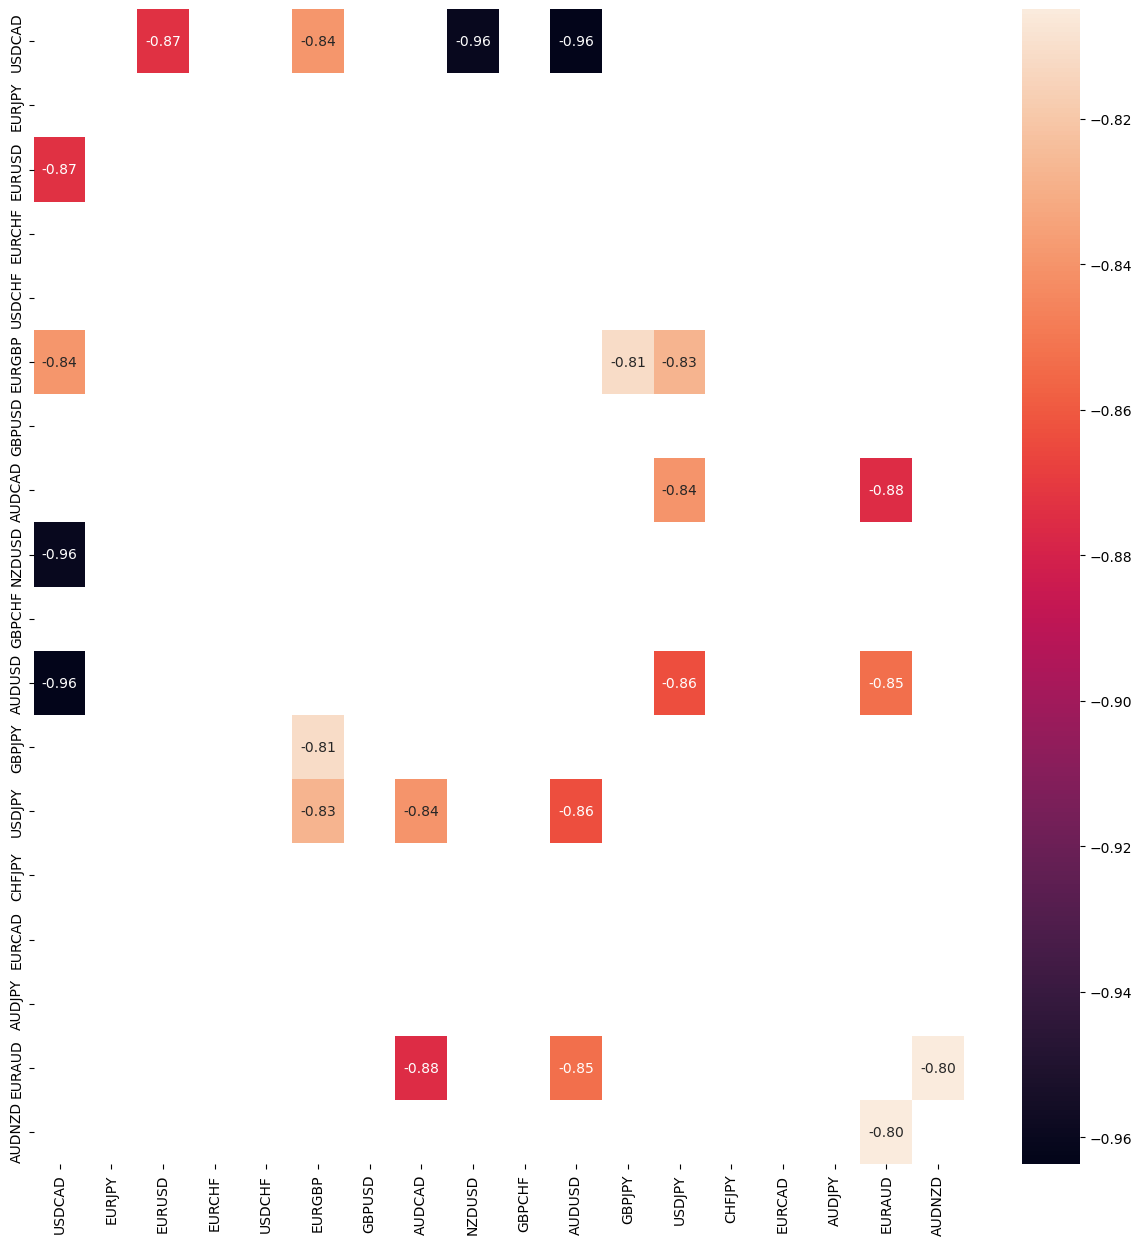

ERROR:asyncio:Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\user\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] Varolan bir bağlantı uzaktaki bir ana bilgisayar tarafından zorla kapatıldı
ERROR:asyncio:Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\user\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           

In [8]:
figure = plt.figure(figsize=(15,15))
sns.heatmap(corr_df[(corr_df<-0.80)],annot=True,fmt=("0.2f") )